In [224]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.feature_extraction import stop_words
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

import numpy as np



In [71]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words



In [263]:
import requests
import bs4
import os

base_url = "http://www.presidency.ucsb.edu/"
speech_list = "http://www.presidency.ucsb.edu/2016_election_speeches.php?candidate=45&campaign=2016TRUMP&doctype=5000"
if not os.path.isdir('data'):
   os.mkdir('data')



# Grab page
res = requests.get(speech_list)
scrape = bs4.BeautifulSoup(res.text, 'lxml')
elements1 = scrape.select('td.listdate')
links1 = []
for i in elements1:
  links1.append(i.text)
links2 =[]
links2.append(links1[1::3])
elems = scrape.select('td.listdate a')
links = []

for e in elems:
    links.append((e.text, e.attrs['href']))
speeches = []
for idx, link in enumerate(links):
#     print("Grabbing speech: ", idx + 1)
    url = base_url + link[1][3:]
    res = requests.get(url)
    scrape = bs4.BeautifulSoup(res.text, 'lxml')
    speech = scrape.select('span.displaytext')[0].text.encode('utf-8')
    speeches.append(speech)

d = {'title' : pd.Series([l for l in links]),
     'dates' : pd.Series(links2[0]),
     'link' : pd.Series([base_url + l[1][3:] for l in links]),
     'speech': pd.Series(speeches)}
df = pd.DataFrame(d)
df = df.drop(['link', 'title'], 1)




In [72]:
dijsselbloem_df = pd.read_csv("Dijsselbloem.csv")



In [274]:
statement_df = pd.read_csv("statement.csv")
statement_df.tail(2)

,Speaker,date,speech,Link
37,Common,05.22.2017,The Eurogroup welcomed the preliminary agreeme...,http://www.consilium.europa.eu/en/meetings/eur...
38,Common,06.15.2017,The Eurogroup finalised its discussion on the ...,http://www.consilium.europa.eu/en/meetings/eur...


In [73]:
regling_df = pd.read_csv("regling.csv")
regling_df = regling_df.drop(regling_df.index[-9:])


In [74]:
moscovici_df = pd.read_csv("Moscovici_English.csv")

In [75]:
mosco_fr = pd.read_csv("Moscovici_french.csv")



In [76]:
moscovici_df = pd.concat([mosco_fr, moscovici_df], ignore_index=True)



In [77]:
dijsselbloem_df.tail()

,Speaker,date,speech
35,Jeroen Dijsselbloem,02.20.2017,Let me come quickly to the topic that probably...
36,Jeroen Dijsselbloem,03.20.2017,Let me start with our discussion on Greece. We...
37,Jeroen Dijsselbloem,04.07.2017,Let me start with Greece. We have achieved sig...
38,Jeroen Dijsselbloem,06.22.2017,"I will only speak about Greece, because I thin..."
39,Jeroen Dijsselbloem,06.15.2017,"Our meeting revolved mainly around Greece, and..."


In [78]:
moscovici_df.tail()

,Speaker,date,speech,Link
18,Pierre Moscovici,11.17.2015,The Greek authorities and the institutions hav...,http://europa.eu/rapid/press-release_STATEMENT...
19,Pierre Moscovici,02.11.2016,Now a word on Greece.\nOur winter forecast las...,http://europa.eu/rapid/press-release_SPEECH-16...
20,Pierre Moscovici,10.10.2016,Thank you Jeroen. Bonsoir à toutes et à tous. ...,http://europa.eu/rapid/press-release_SPEECH-16...
21,Pierre Moscovici,02.20.2017,The further fiscal measures to be pre-legislat...,http://europa.eu/rapid/press-release_SPEECH-17...
22,Pierre Moscovici,05.02.2017,"""The agreement reached overnight in Athens on ...",http://europa.eu/rapid/press-release_STATEMENT...


In [79]:
regling_df.tail()

,Speaker,date,speech,Link
7,Klaus Regling,03.20.2017,Just a few words on Greece from the ESM perspe...,https://www.esm.europa.eu/press-releases/klaus...
8,Klaus Regling,04.07.2017,"But of course, Greece was important and I shar...",https://www.esm.europa.eu/press-releases/klaus...
9,Klaus Regling,05.23.2017,"There was progress, and I think it’s really go...",https://www.esm.europa.eu/press-releases/klaus...
10,Klaus Regling,06.12.2017,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/klaus...
11,Klaus Regling,07.10.2017,"Let me start with Greece, which was not on the...",https://www.esm.europa.eu/press-releases/klaus...


In [80]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df['stemmed'] = emolex_df.word.apply(lambda word: TextBlob(word).tokens[0].stem())
emolex_stemmed_df = emolex_df.drop_duplicates(subset=['stemmed'])
emolex_stemmed_df
emolex_stemmed_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,stemmed
0,aback,0,0,0,0,0,0,0,0,0,0,aback
1,abacus,0,0,0,0,0,0,0,0,0,1,abacu
2,abandon,0,0,0,1,0,1,0,1,0,0,abandon
5,abate,0,0,0,0,0,0,0,0,0,0,abat
7,abba,0,0,0,0,0,0,1,0,0,0,abba


In [81]:
emolex_stemmed_df.tail()


emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,stemmed
14176,zodiac,0,0,0,0,0,0,0,0,0,0,zodiac
14177,zone,0,0,0,0,0,0,0,0,0,0,zone
14178,zoo,0,0,0,0,0,0,0,0,0,0,zoo
14179,zoological,0,0,0,0,0,0,0,0,0,0,zoolog
14181,zoom,0,0,0,0,0,0,0,0,0,0,zoom


In [179]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(dijsselbloem_df['speech'])
vocab = vec.get_feature_names()
wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df1.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df['speech'])
vocab = vec.get_feature_names()
wordcount_df4 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df4.head()



,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.000536,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.001418,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000818,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000981,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False,
                      stop_words='english',
                      tokenizer=textblob_tokenizer,
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(statement_df['speech'])
vocab = vec.get_feature_names()
wordcount_df3 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df3.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      use_idf=False, 
                      tokenizer=textblob_tokenizer,
                      stop_words='english',

                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(moscovici_df['speech'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024096,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [84]:
vec = TfidfVectorizer(vocabulary=emolex_stemmed_df.stemmed,
                      tokenizer=textblob_tokenizer,
                      use_idf=False,
                      stop_words='english',
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(regling_df['speech'])
vocab = vec.get_feature_names()
wordcount_df2 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df2.head()

,aback,abacu,abandon,abat,abba,abbot,abbrevi,abdomen,abdomin,abduct,...,zenith,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoolog,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
dijsselbloem_df['positivity'] = wordcount_df1[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
dijsselbloem_df['anger'] = wordcount_df1[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
dijsselbloem_df['anticipation'] = wordcount_df1[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
dijsselbloem_df['disgust'] = wordcount_df1[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
dijsselbloem_df['fear'] = wordcount_df1[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
dijsselbloem_df['joy'] = wordcount_df1[joy].sum(axis=1)






In [86]:
dijsselbloem_df['date'] = pd.to_datetime(dijsselbloem_df['date'], format="%m.%d.%Y")

In [87]:
dijsselbloem_df.set_index('date', inplace=True)

In [88]:
dijsselbloem_df.tail()

,Speaker,speech,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,
2017-02-20,Jeroen Dijsselbloem,Let me come quickly to the topic that probably...,0.266667,0.008333,0.116667,0.000000,0.041667,0.050000
2017-03-20,Jeroen Dijsselbloem,Let me start with our discussion on Greece. We...,0.222222,0.000000,0.155556,0.000000,0.000000,0.066667
2017-04-07,Jeroen Dijsselbloem,Let me start with Greece. We have achieved sig...,0.264463,0.000000,0.099174,0.000000,0.016529,0.049587
2017-06-22,Jeroen Dijsselbloem,"I will only speak about Greece, because I thin...",0.190789,0.013158,0.125000,0.000000,0.006579,0.046053
2017-06-15,Jeroen Dijsselbloem,"Our meeting revolved mainly around Greece, and...",0.273438,0.015625,0.078125,0.015625,0.039062,0.050781


In [89]:
moscovici_df.tail()

,Speaker,date,speech,Link
18,Pierre Moscovici,11.17.2015,The Greek authorities and the institutions hav...,http://europa.eu/rapid/press-release_STATEMENT...
19,Pierre Moscovici,02.11.2016,Now a word on Greece.\nOur winter forecast las...,http://europa.eu/rapid/press-release_SPEECH-16...
20,Pierre Moscovici,10.10.2016,Thank you Jeroen. Bonsoir à toutes et à tous. ...,http://europa.eu/rapid/press-release_SPEECH-16...
21,Pierre Moscovici,02.20.2017,The further fiscal measures to be pre-legislat...,http://europa.eu/rapid/press-release_SPEECH-17...
22,Pierre Moscovici,05.02.2017,"""The agreement reached overnight in Athens on ...",http://europa.eu/rapid/press-release_STATEMENT...


In [90]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
moscovici_df['positivity'] = wordcount_df[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
moscovici_df['anger'] = wordcount_df[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
moscovici_df['anticipation'] = wordcount_df[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
moscovici_df['disgust'] = wordcount_df[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
moscovici_df['fear'] = wordcount_df[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
moscovici_df['joy'] = wordcount_df[joy].sum(axis=1)







In [91]:
moscovici_df['date'] = pd.to_datetime(moscovici_df['date'], format="%m.%d.%Y")


In [92]:

moscovici_df.set_index('date', inplace=True)

In [93]:
moscovici_df.head()

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2015-09-12,Pierre Moscovici,Je commence par un mot sur la Grèce et sur Chy...,http://europa.eu/rapid/press-release_SPEECH-15...,0.092105,0.013158,0.026316,0.000000,0.000000,0.000000
2015-11-09,Pierre Moscovici,Merci Jeroen. \nJ’ai effectivement informé l’E...,http://europa.eu/rapid/press-release_SPEECH-15...,0.337349,0.024096,0.036145,0.048193,0.036145,0.036145
2015-11-23,Pierre Moscovici,Je vais être très bref car Jeroen a dit l'esse...,http://europa.eu/rapid/press-release_STATEMENT...,0.318182,0.000000,0.136364,0.045455,0.022727,0.022727
2015-12-07,Pierre Moscovici,Je vais commencer par quelques mots sur la Grè...,http://europa.eu/rapid/press-release_SPEECH-15...,0.206897,0.017241,0.068966,0.017241,0.034483,0.068966
2016-01-14,Pierre Moscovici,"Tout d’abord, mes meilleurs vœux à chacune et ...",http://europa.eu/rapid/press-release_SPEECH-16...,0.253333,0.013333,0.026667,0.000000,0.013333,0.013333


In [276]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
regling_df['positivity'] = wordcount_df2[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
regling_df['anger'] = wordcount_df2[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
regling_df['anticipation'] = wordcount_df2[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
regling_df['disgust'] = wordcount_df2[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
regling_df['fear'] = wordcount_df2[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
regling_df['joy'] = wordcount_df2[joy].sum(axis=1)








In [95]:
regling_df['date'] = pd.to_datetime(regling_df['date'], format="%m.%d.%Y")
regling_df.set_index('date', inplace=True)

In [96]:
dijsselbloem_df = dijsselbloem_df.replace(np.NaN, 0)

In [97]:
moscovici_df = moscovici_df.replace(np.NaN, 0)

In [277]:
regling_df = regling_df.replace(np.NaN, 0)

In [279]:
regling_df.head(5)

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2016-04-22,Klaus Regling,A few words on Greece from the ESM perspective...,https://www.esm.europa.eu/press-releases/trans...,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-25,Klaus Regling,The Eurogroup welcomes that a full staff-level...,https://www.esm.europa.eu/press-releases/eurog...,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-10,Klaus Regling,Let me give you a few more details on the disb...,https://www.esm.europa.eu/press-releases/trans...,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-07,Klaus Regling,"On Greece, you’ve heard about the progress the...",https://www.esm.europa.eu/press-releases/trans...,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-05,Klaus Regling,"Good evening, let me say a few words about the...",https://www.esm.europa.eu/press-releases/trans...,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
statement_df['positivity'] = wordcount_df3[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
statement_df['anger'] = wordcount_df3[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
statement_df['anticipation'] = wordcount_df3[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
statement_df['disgust'] = wordcount_df3[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
statement_df['fear'] = wordcount_df3[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
statement_df['joy'] = wordcount_df3[joy].sum(axis=1)








In [182]:
statement_df['date'] = pd.to_datetime(statement_df['date'], format="%m.%d.%Y")
statement_df.set_index('date', inplace=True)
statement_df = statement_df.replace(np.NaN, 0)

In [273]:
statement_df.tail()

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2017-02-20,Common,"The institutions (the European Commission, the...",http://www.consilium.europa.eu/en/meetings/eur...,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-20,Common,"The institutions (the European Commission, the...",http://www.consilium.europa.eu/en/meetings/eur...,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-07,Common,The Eurogroup was briefed on developments in t...,http://www.consilium.europa.eu/en/meetings/eur...,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-22,Common,The Eurogroup welcomed the preliminary agreeme...,http://www.consilium.europa.eu/en/meetings/eur...,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-15,Common,The Eurogroup finalised its discussion on the ...,http://www.consilium.europa.eu/en/meetings/eur...,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
positive_words = emolex_stemmed_df[emolex_stemmed_df.positive == 1].stemmed
df['positivity'] = wordcount_df4[positive_words].sum(axis=1)


angry_words = emolex_stemmed_df[emolex_stemmed_df.anger == 1].stemmed
df['anger'] = wordcount_df4[angry_words].sum(axis=1)

anticipating_words = emolex_stemmed_df[emolex_stemmed_df.anticipation == 1].stemmed
df['anticipation'] = wordcount_df4[anticipating_words].sum(axis=1)

disgusting_words = emolex_stemmed_df[emolex_stemmed_df.disgust == 1].stemmed
df['disgust'] = wordcount_df4[disgusting_words].sum(axis=1)

fear_words = emolex_stemmed_df[emolex_stemmed_df.fear == 1].stemmed
df['fear'] = wordcount_df4[fear_words].sum(axis=1)

joy = emolex_stemmed_df[emolex_stemmed_df.joy == 1].stemmed
df['joy'] = wordcount_df4[joy].sum(axis=1)







In [268]:
df.head(1)

,dates,speech,positivity,anger,anticipation,disgust,fear,joy
0,"June 16, 2015",b'Trump: Wow. Whoa. That is some group of peop...,0.267809,0.041243,0.093733,0.023567,0.049813,0.1173


In [246]:
df_trump['dates'] = pd.to_datetime(df_trump['dates'], format="%B %d, %Y")
df_trump.set_index('dates', inplace=True)
df_trump = statement_df.replace(np.NaN, 0)

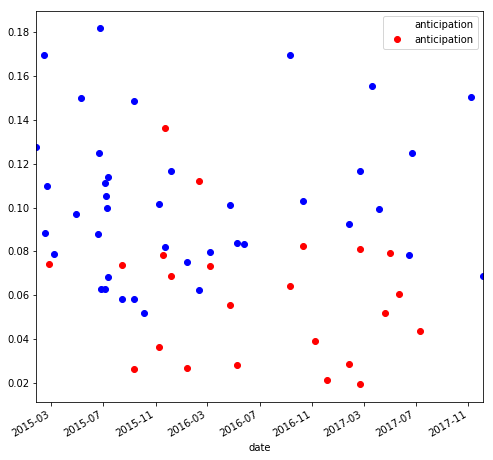

In [194]:
ax = dijsselbloem_df.plot(y='anticipation', marker='o', linestyle='', figsize=(8,8), c='blue')
moscovici_df.plot(y='anticipation', marker='o', linestyle='', c='red', ax=ax)

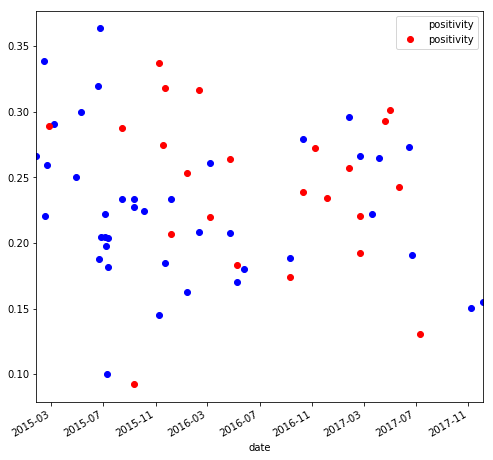

In [195]:
ax = dijsselbloem_df.plot(y='positivity', marker='o', linestyle='', figsize=(8,8), c='blue')
moscovici_df.plot(y='positivity', marker='o', linestyle='', c='red', ax=ax)

(0, 0.6)

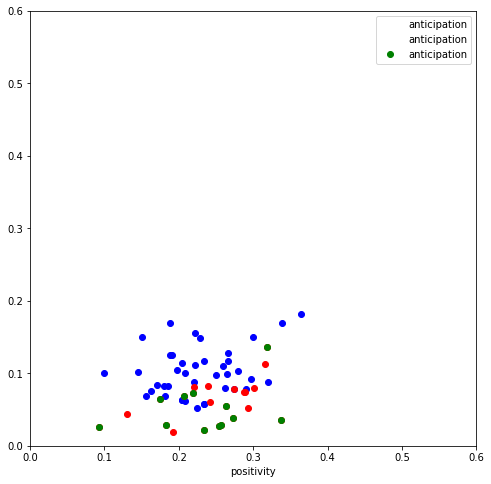

In [100]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='positivity', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='positivity', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='positivity', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

(0, 0.3)

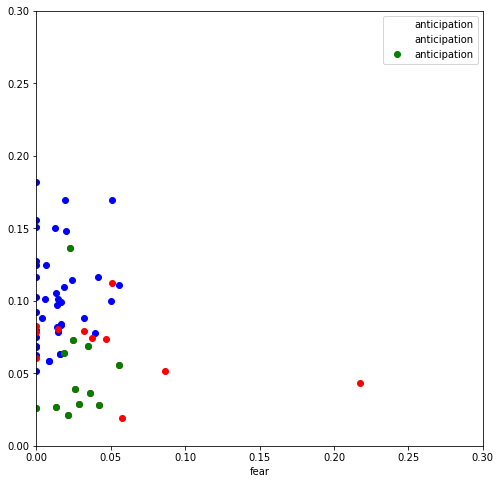

In [101]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='fear', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='fear', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='fear', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.3)
ax.set_ylim(0,0.3)

(0, 0.3)

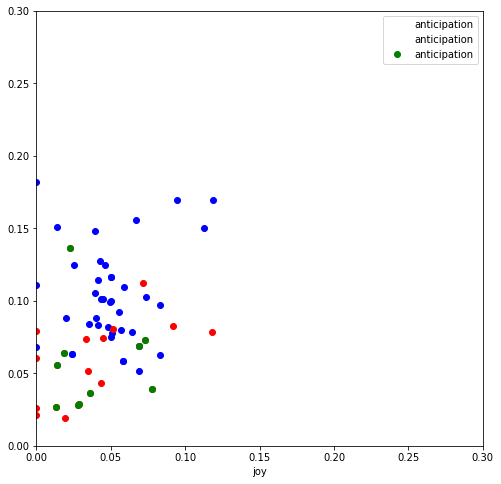

In [201]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='anticipation', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='anticipation', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.3)
ax.set_ylim(0,0.3)

(0, 0.6)

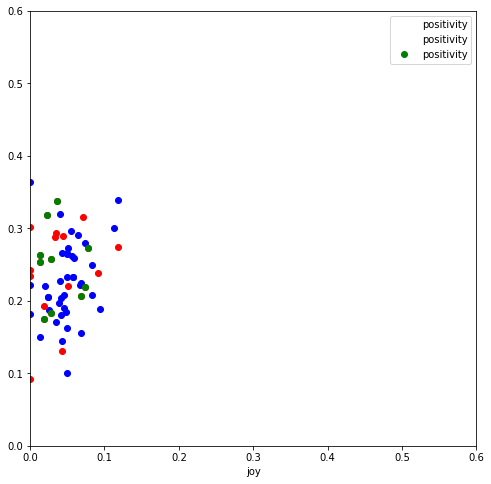

In [203]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [132]:
dijsselbloem_df.head(1)

,Speaker,speech,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,
2015-01-26,Jeroen Dijsselbloem,Good evening and welcome to this press confere...,0.265957,0.010638,0.12766,0.010638,0.0,0.042553


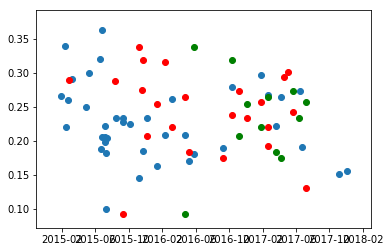

In [153]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.positivity)
ax.scatter(x= moscovici_df.index, y = moscovici_df.positivity, color='red')
ax.scatter(x= regling_df.index, y = regling_df.positivity, color='green')




(0, 0.6)

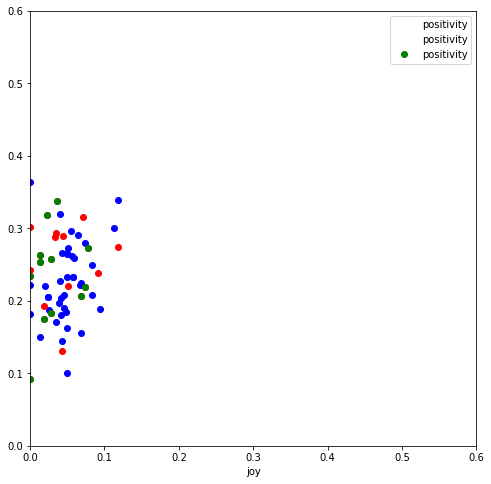

In [131]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [34]:
dijsselbloem_df.head(1)

,Speaker,speech,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,
2015-01-26,Jeroen Dijsselbloem,Good evening and welcome to this press confere...,0.196721,NaN,0.04918,NaN,NaN,0.016393


(0, 0.6)

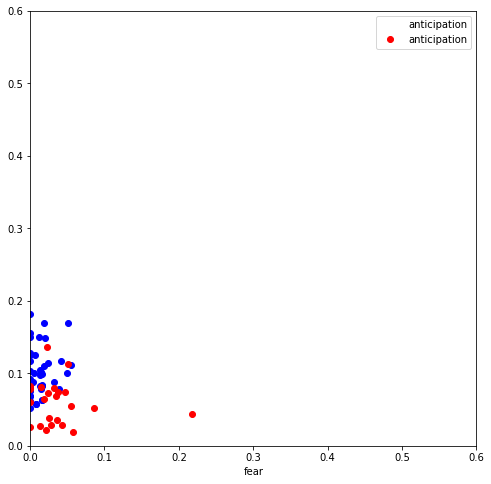

In [130]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='fear', y='anticipation', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='fear', y='anticipation', c='red', ax=ax, marker='o', linestyle='')

ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

In [87]:
dijsselbloem_df[0:20]

,Speaker,speech,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,
2015-01-26,Jeroen Dijsselbloem,Good evening and welcome to this press confere...,0.271186,0.000000,0.152542,0.000000,0.067797,0.084746
2015-02-12,Jeroen Dijsselbloem,"Today, as you well know, we had an extra Eurog...",0.358974,0.051282,0.256410,0.025641,0.102564,0.128205
2015-02-16,Jeroen Dijsselbloem,"Then turning to the Greece, as you remember th...",0.233533,0.005988,0.071856,0.017964,0.029940,0.023952
2015-02-20,Jeroen Dijsselbloem,Good evening and welcome to this press confere...,0.281250,0.007812,0.125000,0.011719,0.023438,0.078125
2015-03-09,Jeroen Dijsselbloem,After the last Eurogroup decision on the exten...,0.291667,0.000000,0.075000,0.000000,0.000000,0.041667
2015-04-29,Jeroen Dijsselbloem,"Today, the institutions informed us about the ...",0.312500,0.020833,0.145833,0.041667,0.041667,0.125000
2015-05-11,Jeroen Dijsselbloem,"Let me start with Greece, as it is in the lime...",0.392857,0.000000,0.214286,0.017857,0.017857,0.125000
2015-06-18,Jeroen Dijsselbloem,The Eurogroup today took stock of the situatio...,0.349398,0.024096,0.120482,0.036145,0.048193,0.024096
2015-06-22,Jeroen Dijsselbloem,Good afternoon everyone. This will be a very s...,0.207547,0.000000,0.150943,0.000000,0.075472,0.037736


In [124]:
%%time
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters usinga ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

Fitting 5 clusters usinga  (3, 250) matrix


ValueError: n_samples=3 should be >= n_clusters=5

In [127]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
        ngram_range=(3,3),


                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(dijsselbloem_df['speech'][0:20])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 25.2 ms, sys: 2.22 ms, total: 27.4 ms
Wall time: 25.9 ms


In [128]:
%%time
from sklearn.cluster import KMeans

# How many clusters?
number_of_clusters=5
km = KMeans(n_clusters=number_of_clusters)

print("Fitting", number_of_clusters, "clusters usinga ", matrix.shape, "matrix")

# Let's fit it!
km.fit(matrix)
km.fit

Fitting 5 clusters usinga  (20, 250) matrix
CPU times: user 83.2 ms, sys: 3.56 ms, total: 86.8 ms
Wall time: 85.7 ms


In [129]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, '| '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: basis successful conclusion| review like reiterate| comprehensive detailed list| reiterate agreement 20| institutions informed ongoing
Cluster 1: talks greek authorities| welcome press conference| expiry date current| governors formal decision| government worked hard
Cluster 2: new greek government| discussions greek authorities| evening welcome press| good evening welcome| welcome press conference
Cluster 3: institutions greek authorities| july 2015 eurogroup| new esm programme| continue talks monday| greek authorities institutions
Cluster 4: gross financing needs| board consider financial| consider financial support| prior actions legislated| imf board consider


In [118]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
    ngram_range=(3,3),
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(dijsselbloem_df['speech'][21:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 29.8 ms, sys: 14.1 ms, total: 43.9 ms
Wall time: 43.8 ms


Fitting 5 clusters usinga  (19, 250) matrix
CPU times: user 82.4 ms, sys: 6.21 ms, total: 88.6 ms
Wall time: 87.2 ms


In [120]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, '| '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: pending fully complete| quickly following closely| today discussed state| place completion recapitalisation| play esm lot
Cluster 1: mission chiefs return| chiefs return athens| greece discussed state| discussed state play| staff level agreement
Cluster 2: staff level agreement| institutions greek government| reach staff level| short term measures| state play second
Cluster 3: institutions greek authorities| possible debt relief| measures short term| cooperation institutions greek| debt relief measures
Cluster 4: second set milestones| esm board directors| greek authorities implement| pensions energy sector| presume end october


In [121]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
        ngram_range=(3,3),


                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][0:3])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 9.03 ms, sys: 600 µs, total: 9.63 ms
Wall time: 9.38 ms


In [122]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: le timing la pour présenter nos sur la grèce leurs efforts réforme monde fasse dernier
Cluster 1: la stabilité financière draft budgetary plans la mi octobre est très important programme est très
Cluster 2: programme est très la protection des prenait déjà ce programme ai dit programme et leur
Cluster 3: la prochaine étape paquet milestones et la question première en œuvre du est la question
Cluster 4: prochaines étapes en la grèce étais la mise en les autres pays plans little add


In [102]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True,
                      ngram_range=(2,2))



# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][4:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

CPU times: user 31.8 ms, sys: 1.7 ms, total: 33.5 ms
Wall time: 33.2 ms


In [103]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: le plus en grèce la première que la la réforme
Cluster 1: que la prochains jours que nous plusieurs sujets la fois
Cluster 2: que ce programme grec cette décision ce qui le savez
Cluster 3: je espère les prochains avons fait même si etats membres
Cluster 4: memorandum understanding et pour rapidement possible european stability tout le
Cluster 5: technical assistance dans le discussions dans technical work discussion sur
Cluster 6: est la dans intérêt je veux intérêt du dont les
Cluster 7: revenus et autorités grecques des discussions banking sector peuple grec
Cluster 8: tout le grecs et tous les greek government avec des
Cluster 9: pour poursuivre avec beaucoup ceux ci une discussion première revue


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# Vectorize and save into a new dataframe
vec = TfidfVectorizer(
                      stop_words='english',
                      max_df= 0.9,
                    max_features = 250,
                      use_idf=True)

# Fit from the 'text' column of our dataframe
matrix = vec.fit_transform(moscovici_df['speech'][4:])

# Then turn it into a new dataframe
results = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

In [139]:
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False,
                      stop_words='english',
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(regling_df['speech'])
vocab = vec.get_feature_names()
wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df1.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words



In [143]:
regling_words = regling_df['speech'].apply(textblob_tokenizer)

In [144]:
for word in regling_words:
    print("ORIGINAL:", word, "| LEMMA:", word.lemmatize(), "| STEM:", word.stem())


AttributeError: 'list' object has no attribute 'lemmatize'

In [146]:
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      tokenizer=textblob_tokenizer,
                      use_idf=False,
                      stop_words='english',
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(regling_df['speech'])
vocab = vec.get_feature_names()
wordcount_df1 = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df1.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
emolex_df.word.head()

0          aback
1         abacus
2        abandon
3      abandoned
4    abandonment
Name: word, dtype: object

In [152]:
fig, ax = plt.subplots()

dijsselbloem_df.plot(x='joy', y='positivity', c='blue', marker='o', linestyle='', ax=ax, figsize=(8,8))
moscovici_df.plot(x='joy', y='positivity', c='red', ax=ax, marker='o', linestyle='')
regling_df.plot(x='joy', y='positivity', c='green', ax=ax, marker='o', linestyle='')


ax.set_xlim(0,0.6)
ax.set_ylim(0,0.6)

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,stemmed
0,aback,0,0,0,0,0,0,0,0,0,0,aback
1,abacus,0,0,0,0,0,0,0,0,0,1,abacu
2,abandon,0,0,0,1,0,1,0,1,0,0,abandon
3,abandoned,1,0,0,1,0,1,0,1,0,0,abandon
4,abandonment,1,0,0,1,0,1,0,1,1,0,abandon


In [239]:
dijsselbloem_df.resample('m').head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,
2015-01-31,0.265957,0.010638,0.127660,0.010638,0.000000,0.042553
2015-02-28,0.273075,0.015759,0.122490,0.010110,0.024527,0.065849
2015-03-31,0.290640,0.014778,0.078818,0.004926,0.014778,0.064039
2015-04-30,0.250000,0.027778,0.097222,0.027778,0.013889,0.083333
2015-05-31,0.300000,0.000000,0.150000,0.000000,0.012500,0.112500


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called dropna(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


KeyError: 'date'

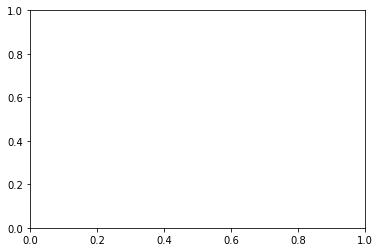

In [263]:
dijsselbloem_df.resample('m').dropna().reset_index().plot(kind='scatter',x='date', y='positivity')

In [278]:
dijsselbloem_df.resample('2w').dropna().reset_index().plot(y='positivity', x='index')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called dropna(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


KeyError: 'index'

In [158]:
dijsselbloem_df.head(1)

,Speaker,speech,positivity,anger,anticipation,disgust,fear,joy,utf
date,,,,,,,,,
2015-01-26,Jeroen Dijsselbloem,Good evening and welcome to this press confere...,0.265957,0.010638,0.12766,0.010638,0.0,0.042553,NaN


(0, 0.6)

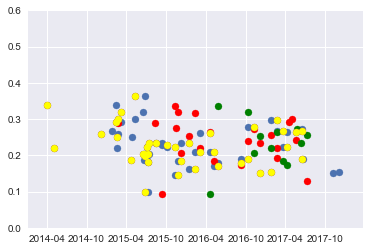

In [249]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.positivity)
ax.scatter(x= moscovici_df.index, y = moscovici_df.positivity, color='red')
ax.scatter(x= regling_df.index, y = regling_df.positivity, color='green')
ax.scatter(x= statement_df.index, y = statement_df.positivity, color='purple')
ax.scatter(x= df_trump.index, y = df_trump.positivity, color='yellow')




ax.set_ylim(0,0.6)


(0, 0.3)

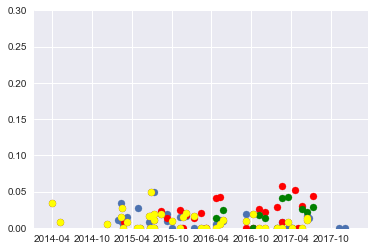

In [250]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.anger)
ax.scatter(x= moscovici_df.index, y = moscovici_df.anger, color='red')
ax.scatter(x= regling_df.index, y = regling_df.anger, color='green')
ax.scatter(x= statement_df.index, y = statement_df.anger, color='purple')
ax.scatter(x= df_trump.index, y = df_trump.anger, color='yellow')



ax.set_ylim(0,0.3)




(0, 0.3)

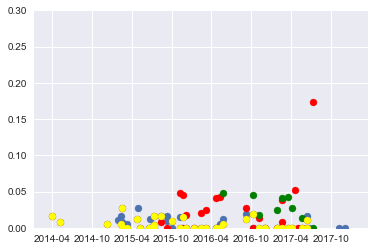

In [252]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.disgust)
ax.scatter(x= moscovici_df.index, y = moscovici_df.disgust, color='red')
ax.scatter(x= regling_df.index, y = regling_df.disgust, color='green')

ax.scatter(x= statement_df.index, y = statement_df.disgust, color='purple')
ax.scatter(x= df_trump.index, y = df_trump.disgust, color='yellow')





ax.set_ylim(0,0.3)


(0, 0.3)

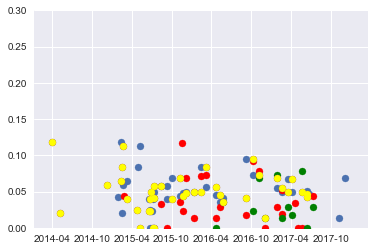

In [253]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.joy)
ax.scatter(x= moscovici_df.index, y = moscovici_df.joy, color='red')
ax.scatter(x= regling_df.index, y = regling_df.joy, color='green')
ax.scatter(x= statement_df.index, y = statement_df.joy, color='purple')
ax.scatter(x= df_trump.index, y = df_trump.joy, color='yellow')



ax.set_ylim(0,0.3)







NameError: name 'x' is not defined

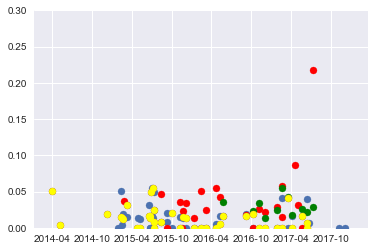

In [254]:
fig, ax = plt.subplots()
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')
ax.scatter(x= df_trump.index, y = df_trump.fear, color='yellow')


ax.set_ylim(0,0.3)




plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

(0, 0.3)

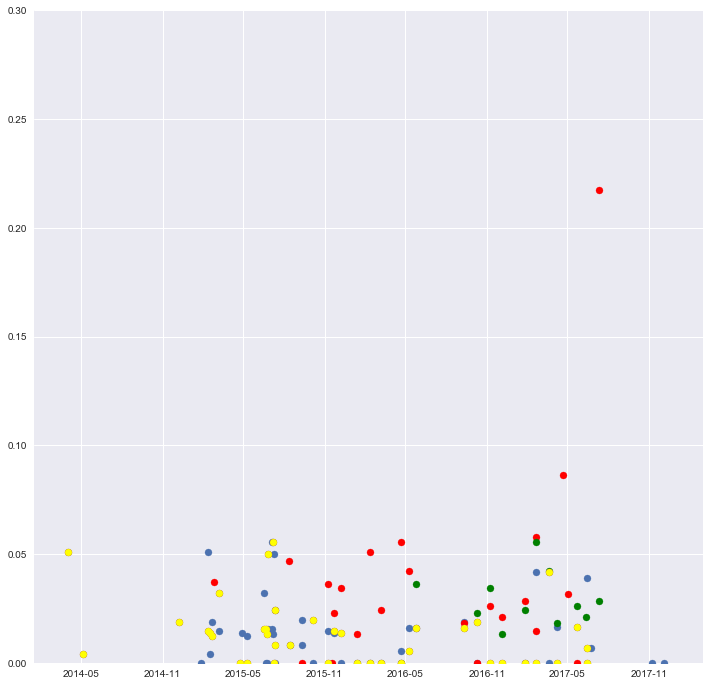

In [255]:
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')
ax.scatter(x= df_trump.index, y = df_trump.fear, color='yellow')


ax.set_ylim(0,0.3)




In [175]:
moscovici_df.sort_values('disgust', ascending=False).head(2)

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2017-07-10,Pierre Moscovici,"Enfin, il faut dire que cette réunion a été im...",http://europa.eu/rapid/press-release_SPEECH-17...,0.130435,0.043478,0.043478,0.173913,0.217391,0.043478
2017-04-20,Pierre Moscovici,"Bonsoir. Sur la Grèce, comme Jeroen l'a dit, l...",http://europa.eu/rapid/press-release_SPEECH-17...,0.293103,0.051724,0.051724,0.051724,0.086207,0.034483


In [174]:
moscovici_df.sort_values('fear', ascending=False).head(2)

,Speaker,speech,Link,positivity,anger,anticipation,disgust,fear,joy
date,,,,,,,,,
2017-07-10,Pierre Moscovici,"Enfin, il faut dire que cette réunion a été im...",http://europa.eu/rapid/press-release_SPEECH-17...,0.130435,0.043478,0.043478,0.173913,0.217391,0.043478
2017-04-20,Pierre Moscovici,"Bonsoir. Sur la Grèce, comme Jeroen l'a dit, l...",http://europa.eu/rapid/press-release_SPEECH-17...,0.293103,0.051724,0.051724,0.051724,0.086207,0.034483


TypeError: float() argument must be a string or a number, not 'Timestamp'

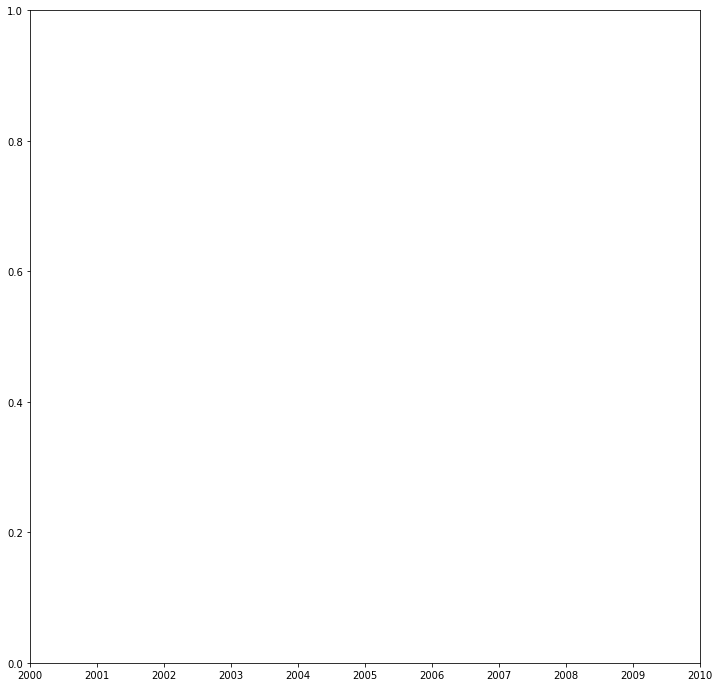

In [206]:
fig, ax = plt.subplots(figsize=(12,12))
points = plt.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear, s=75)

#points = plt.scatter(x = data['Date'], y = data["Words"], c=data["Words"], s=75, cmap="BrBG")

plt.colorbar(points)
sns.regplot(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, data=dijsselbloem_df, scatter=False, color='r')



In [ ]:
sns.regplot(x=dijsselbloem_df.index, y=dijsselbloem_df.fear, data=dijsselbloem_df);

TypeError: invalid type promotion

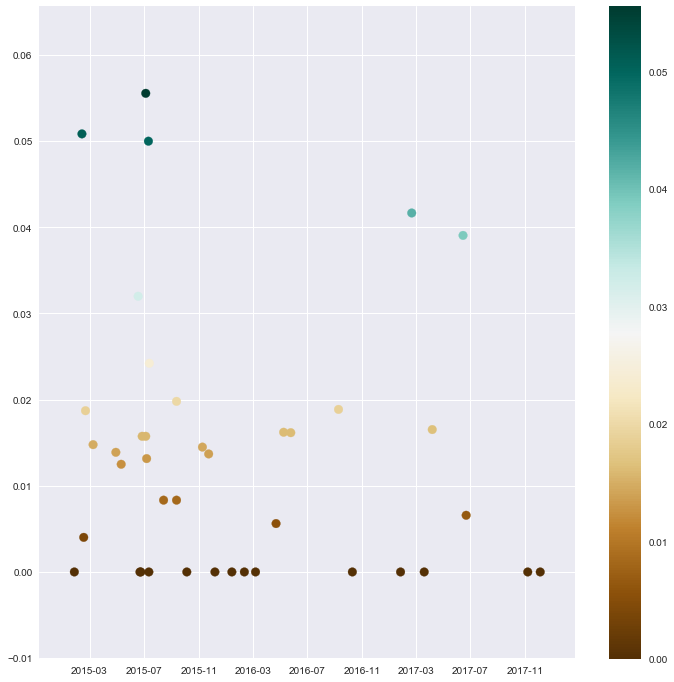

In [235]:

fig, ax = plt.subplots(figsize=(12,12))
points = plt.scatter(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, s=75, c=dijsselbloem_df.fear,  cmap="BrBG")

plt.colorbar(points)
sns.regplot(x = dijsselbloem_df.index, y = dijsselbloem_df.fear, data=dijsselbloem_df, scatter=False, color='r',fit_reg=True)


ax = plt.gca()
xticks = ax.get_xticks()
xticks_dates = [datetime.datetime.fromtimestamp(dijsselbloem_df.index).strftime('%Y-%m-%d %H:%M:%S') for x in xticks]

plt.plot(np.unique(points), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
#xticks_dates = [dijsselbloem_df.index.strftime('%Y') for x in xticks]
ax.set_xticklabels(xticks_dates)
ax.set_ylim(0,0.3)



    # Add correlation line
#     axes = plt.gca()
#     m, b = np.polyfit(x, y, 1)
#     X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
#     plt.plot(X_plot, m*X_plot + b, '-')


# fig, ax = plt.subplots(figsize=(12,12))
# ax.scatter(x= dijsselbloem_df.index, y = dijsselbloem_df.fear)
# ax.scatter(x= moscovici_df.index, y = moscovici_df.fear, color='red')
# ax.scatter(x= regling_df.index, y = regling_df.fear, color='green')
# ax.scatter(x= statement_df.index, y = statement_df.fear, color='purple')







In [257]:
import requests
import bs4
import os

base_url = "http://www.presidency.ucsb.edu/"
speech_list = "http://www.presidency.ucsb.edu/2016_election_speeches.php?candidate=45&campaign=2016TRUMP&doctype=5000"
if not os.path.isdir('data'):
   os.mkdir('data')



# Grab page
res = requests.get(speech_list)
scrape = bs4.BeautifulSoup(res.text, 'lxml')
elements1 = scrape.select('td.listdate')
links1 = []
for i in elements1:
  links1.append(i.text)
links2 =[]
links2.append(links1[1::3])
elems = scrape.select('td.listdate a')
links = []

for e in elems:
    links.append((e.text, e.attrs['href']))
speeches = []
for idx, link in enumerate(links):
#     print("Grabbing speech: ", idx + 1)
    url = base_url + link[1][3:]
    res = requests.get(url)
    scrape = bs4.BeautifulSoup(res.text, 'lxml')
    speech = scrape.select('span.displaytext')[0].text.encode('utf-8')
    speeches.append(speech)

d = {'title' : pd.Series([l for l in links]),
     'dates' : pd.Series(links2[0]),
     'link' : pd.Series([base_url + l[1][3:] for l in links]),
     'speech': pd.Series(speeches)}
df = pd.DataFrame(d)
df = df.drop(['link', 'title'], 1)



Grabbing speech:  1
Grabbing speech:  2
Grabbing speech:  3
Grabbing speech:  4
Grabbing speech:  5
Grabbing speech:  6
Grabbing speech:  7
Grabbing speech:  8
Grabbing speech:  9
Grabbing speech:  10
Grabbing speech:  11
Grabbing speech:  12
Grabbing speech:  13
Grabbing speech:  14
Grabbing speech:  15
Grabbing speech:  16
Grabbing speech:  17
Grabbing speech:  18
Grabbing speech:  19
Grabbing speech:  20
Grabbing speech:  21
Grabbing speech:  22
Grabbing speech:  23
Grabbing speech:  24
Grabbing speech:  25
Grabbing speech:  26
Grabbing speech:  27
Grabbing speech:  28
Grabbing speech:  29
Grabbing speech:  30
Grabbing speech:  31
Grabbing speech:  32
Grabbing speech:  33
Grabbing speech:  34
Grabbing speech:  35
Grabbing speech:  36
Grabbing speech:  37
Grabbing speech:  38
Grabbing speech:  39
Grabbing speech:  40
Grabbing speech:  41
Grabbing speech:  42
Grabbing speech:  43
Grabbing speech:  44
Grabbing speech:  45
Grabbing speech:  46
Grabbing speech:  47
Grabbing speech:  48
G